<a href="https://colab.research.google.com/github/celine742/projet_spie/blob/main/PSIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DATA = '/content/drive/Shareddrives/Etude de cas PSIE/Etude de cas Spie/Prev-Optim conso ELEC/Pred-optim conso Reseau DistriBT'

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np

## Conso d'une maison pour un jour

In [ ]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
listDataByHouse = []

dataByHouse = pd.read_csv('/content/drive/Shareddrives/Etude de cas PSIE/DataByType/M120-5.csv')
dataByHouse['datetime'] = pd.to_datetime(dataByHouse['datetime'])
dataByHouse

,datetime,typeLogement,surface,nbHabs,conso
0,2020-01-01 00:00:00,1.0,120.0,5.0,1.001604
1,2020-01-01 00:30:00,1.0,120.0,5.0,1.004254
2,2020-01-01 01:00:00,1.0,120.0,5.0,0.969476
3,2020-01-01 01:30:00,1.0,120.0,5.0,1.524258
4,2020-01-01 02:00:00,1.0,120.0,5.0,1.711575
...,...,...,...,...,...
51787,2022-12-14 21:30:00,1.0,120.0,5.0,0.751801
51788,2022-12-14 22:00:00,1.0,120.0,5.0,0.793610
51789,2022-12-14 22:30:00,1.0,120.0,5.0,0.811295
51790,2022-12-14 23:00:00,1.0,120.0,5.0,0.771616


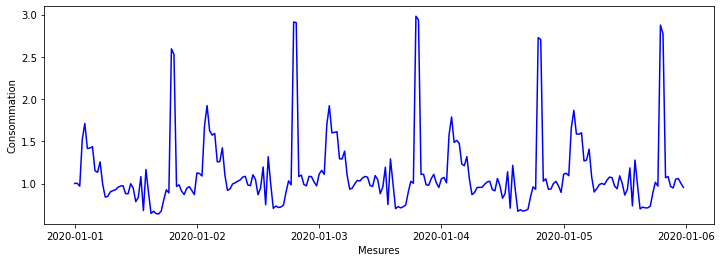

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(dataByHouse['datetime'][0:240], dataByHouse['conso'][0:240], color='b')
plt.xlabel("Mesures")
plt.ylabel("Consommation")
plt.show()

# Data Processing pour la consommation totale par jour

Récupérer les infos par maison

In [ ]:
for folder in os.listdir(DATA):
  tmp = folder[5:].split('-')

  typeHouse = tmp[0][0]
  surface = int(tmp[0][1:])
  nbHab = int(tmp[1])

  #print(f'{typeHouse} {surface} {nbHab}')

  for f in os.listdir(DATA + '/' + folder):
    if typeHouse == 'A' and surface == 120 and nbHab == 4:
      id = f[20:-5]
    else:
      id = f.split('-')[2][:-4]

    #print('\t' + id)

Récupérer la consommation totale par jour

In [ ]:
sumConso = pd.DataFrame(np.zeros(1080), columns=['Unnamed: 1'])

for folder in os.listdir(DATA):
  for f in os.listdir(DATA + '/' + folder):
    
    df = pd.read_csv(f'{DATA}/{folder}/{f}')
    sumConso['Unnamed: 1'] += df['Unnamed: 1'].values


print(sumConso)

"""
df = pd.read_csv(f'{DATA}/data A15-1/data_maison_A15-1-1.csv')
df2 = pd.read_csv(f'{DATA}/data A15-1/data_maison_A15-1-2.csv')
print(df['Unnamed: 1'].values)
print(df2['Unnamed: 1'].values)
print(df['Unnamed: 1'] + df2['Unnamed: 1'].values)
"""

       Unnamed: 1
0             NaN
1     507813.1930
2     736893.4079
3     987414.6313
4     120746.7352
...           ...
1075  667532.2040
1076  638165.3757
1077  681086.1861
1078  677697.6606
1079  607668.8550

[1080 rows x 1 columns]


"\ndf = pd.read_csv(f'{DATA}/data A15-1/data_maison_A15-1-1.csv')\ndf2 = pd.read_csv(f'{DATA}/data A15-1/data_maison_A15-1-2.csv')\nprint(df['Unnamed: 1'].values)\nprint(df2['Unnamed: 1'].values)\nprint(df['Unnamed: 1'] + df2['Unnamed: 1'].values)\n"

Ajouter le jour au dataframe et recommer la colonne `Unnamed: 1`

In [ ]:
sumConso.rename(columns={'Unnamed: 1': 'Sum'})

,Sum
0,NaN
1,507813.1930
2,736893.4079
3,987414.6313
4,120746.7352
...,...
1075,667532.2040
1076,638165.3757
1077,681086.1861
1078,677697.6606


In [ ]:
# Récupérer la colonne date
df = pd.read_csv(f'{DATA}/data A15-1/data_maison_A15-1-1.csv')
df['date'].head()

0           NaN
1    12/14/2022
2    12/13/2022
3    12/12/2022
4    12/11/2022
Name: date, dtype: object

In [ ]:
res = pd.concat([sumConso, df['date']], axis=1, ignore_index=True, sort=False)
res

,0,1
0,NaN,NaN
1,507813.1930,12/14/2022
2,736893.4079,12/13/2022
3,987414.6313,12/12/2022
4,120746.7352,12/11/2022
...,...,...
1075,667532.2040,1/5/2020
1076,638165.3757,1/4/2020
1077,681086.1861,1/3/2020
1078,677697.6606,1/2/2020


In [ ]:
res = res.dropna()

Sauvegarder le dataframe

In [ ]:
res.to_csv('/content/drive/Shareddrives/Etude de cas PSIE/Conso_totale_par_jour.csv')

# Process conso totale par jour

In [ ]:
consoTotaleParJour = pd.read_csv('/content/drive/Shareddrives/Etude de cas PSIE/Conso_totale_par_jour.csv', index_col=0)
consoTotaleParJour = consoTotaleParJour.rename(columns={'0': 'Sum', '1': 'Date'})
consoTotaleParJour['Date'] = pd.to_datetime(consoTotaleParJour['Date'], format="%m/%d/%Y")
consoTotaleParJour.set_index(['Date'],inplace=True)

In [ ]:
consoTotaleParJour['Sum'].describe().apply(lambda x: format(x, 'f'))

count       1079.000000
mean      434876.686481
std       215192.219468
min        88091.511000
25%       251185.774350
50%       400608.130700
75%       596907.421500
max      1086720.259300
Name: Sum, dtype: object

In [ ]:
import datetime as dt
consoTotaleParJour.index.map(dt.datetime.toordinal)

Int64Index([738503, 738502, 738501, 738500, 738499, 738498, 738497, 738496,
            738495, 738494,
            ...
            737434, 737433, 737432, 737431, 737430, 737429, 737428, 737427,
            737426, 737425],
           dtype='int64', name='Date', length=1079)

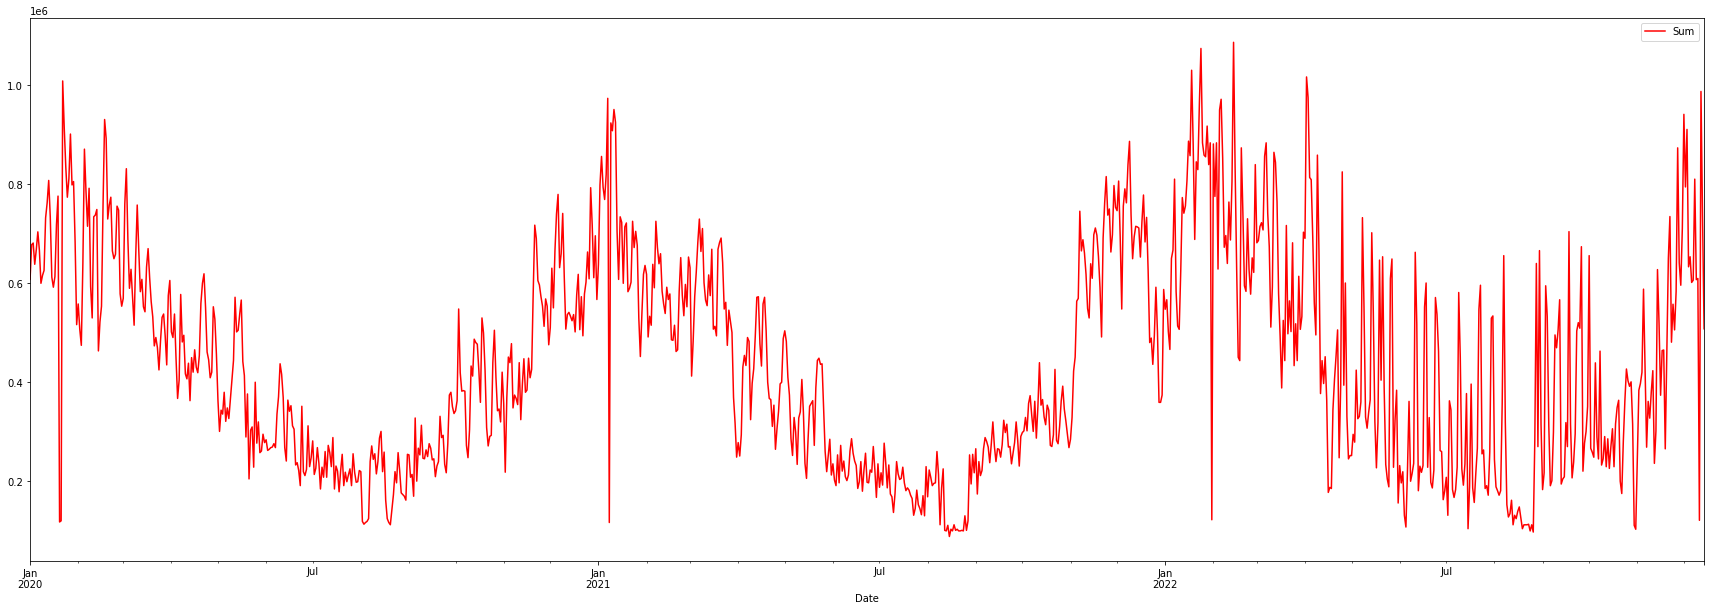

In [ ]:
consoTotaleParJour.plot(figsize=(30, 10),color='red')

# Conso par maison

## Formatage des données

Etablir la consommation pour une maison (type, surface, nombre d'habitants) en fonction de la date et l'heure  
D'abord sur un échantillon réduit de 10 maisons par type.

In [ ]:
import datetime as dt

In [ ]:
listDataByHouse = []

for folder in os.listdir(DATA):
  print(folder)
  i = 0
  for f in os.listdir(DATA + '/' + folder):
    tmp = folder[5:].split('-')

    if tmp[0][0] == 'A':
      appart = 1
      maison = 0
    else:
      appart = 0
      maison = 1

    surface = int(tmp[0][1:])
    nbHab = int(tmp[1])

    #Dossier avec des noms de fichiers différents
    if appart == 1 and surface == 120 and nbHab == 4:
      id = f[20:-5]
    else:
      id = f.split('-')[2][:-4]

    df = pd.read_csv(f'{DATA}/{folder}/{f}')
    for index, rows in df.iterrows():
      if(index == 0):
        continue
      
      tmp = rows[0].split('/')
      # Use 2020 so same date with different year got the same info (pas forcément obligatoire)
      date = dt.date(int(tmp[2]), int(tmp[0]), int(tmp[1])).toordinal()

      #Parse by column (for each hour)
      for j in range(0, len(rows)-2):
        listDataByHouse.append([appart, maison, surface, nbHab, date, j, float(rows[j+2])])
    
    #get first 5 files
    i += 1
    if i >= 5:
      break

dataByHouse = pd.DataFrame(listDataByHouse, columns=['appart', 'maison', 'surface', 'nbHabs', 'date', 'heure', 'conso'])
dataByHouse

data M150-4
data M85-3
data M140-5
data A30-2
data A15-1
data A25-1
data A50-2
data A50-3
data A100-3
data A110-5
data M200-6
data M50-2
data M120-5
data A150-6
data A130-4
data M65-3
data M80-2
data A120-4
data M135-3
data M170-6
data M160-5
data M110-4
data M100-3
data M180-5
data M250-5
data M90-4


,appart,maison,surface,nbHabs,date,heure,conso
0,0,1,150,4,738503,0,0.7073
1,0,1,150,4,738503,1,0.9777
2,0,1,150,4,738503,2,0.6914
3,0,1,150,4,738503,3,1.2878
4,0,1,150,4,738503,4,1.0651
...,...,...,...,...,...,...,...
6732955,0,1,90,4,737425,43,0.5098
6732956,0,1,90,4,737425,44,0.6332
6732957,0,1,90,4,737425,45,0.8680
6732958,0,1,90,4,737425,46,0.8770


In [ ]:
dataByHouse.dtypes

typeLogement      int64
surface           int64
nbHabs            int64
date              int64
heure             int64
conso           float64
dtype: object

In [ ]:
dataByHouse.to_csv('/content/drive/Shareddrives/Etude de cas PSIE/15_premiers_fichiers.csv')

In [ ]:
dataByHouse = pd.read_csv('/content/drive/Shareddrives/Etude de cas PSIE/15_premiers_fichiers.csv')

## Modèle régression linéaire

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = dataByHouse[list(dataByHouse.columns)[:-1]]
Y = dataByHouse['conso']
model = LinearRegression().fit(X, Y)

print(model.score(X, Y))

0.27389713610890487


A chier car la date et l'heure sont des variables qualitatives, et qu'il faut différencier le type de logement

## Modèle LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

In [ ]:
dataByHouse.set_index('date')

,appart,maison,surface,nbHabs,heure,conso
date,,,,,,
738503,0,1,150,4,0,0.7073
738503,0,1,150,4,1,0.9777
738503,0,1,150,4,2,0.6914
738503,0,1,150,4,3,1.2878
738503,0,1,150,4,4,1.0651
...,...,...,...,...,...,...
737425,0,1,90,4,43,0.5098
737425,0,1,90,4,44,0.6332
737425,0,1,90,4,45,0.8680


In [ ]:
trainX = dataByHouse.drop('conso', axis = 1)
trainY = dataByHouse['conso']

In [ ]:
dataByHouse.shape

(6732960, 7)

In [ ]:
model = Sequential()
model.add(
    Input(shape=(1, 6), name="Input")
)
model.add(
    LSTM(32, name="LSTM", dropout=0.1)
)
model.add(
    Dense(1, name="Output")
)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden (Dense)              (None, 1, 64)             448       
                                                                 
 LSTM (LSTM)                 (None, 30)                11400     
                                                                 
 Output (Dense)              (None, 1)                 31        
                                                                 
Total params: 11,879
Trainable params: 11,879
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(tf.expand_dims(trainX, axis=1), trainY, epochs=5, batch_size=2000, verbose=1)

Epoch 1/5
3367/3367 [==============================] - 42s 12ms/step - loss: 0.3965
Epoch 2/5
3367/3367 [==============================] - 39s 12ms/step - loss: 0.3901
Epoch 3/5
3367/3367 [==============================] - 40s 12ms/step - loss: 0.3899
Epoch 4/5
3367/3367 [==============================] - 38s 11ms/step - loss: 0.3899
Epoch 5/5
3367/3367 [==============================] - 38s 11ms/step - loss: 0.3898


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('#epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

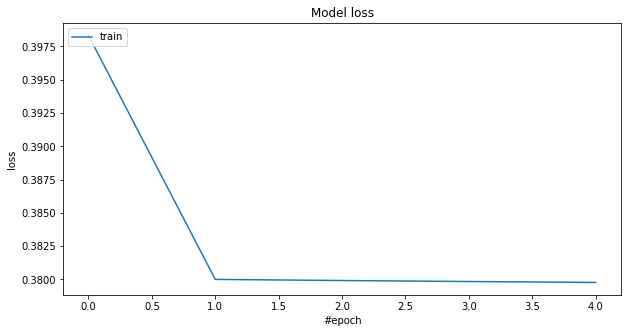

In [ ]:
plot_learning_curves(history)

In [ ]:
model.predict(tf.expand_dims(
    [[1, 0, 90, 3, 737425, 0], [1, 0, 90, 3, 737425, 10]]
    , axis = 1
))

1/1 [==============================] - 0s 20ms/step


array([[0.6292785],
       [0.6292785]], dtype=float32)

## Modèle regressoin logistique

https://towardsdatascience.com/replicate-a-logistic-regression-model-as-an-artificial-neural-network-in-keras-cd6f49cf4b2c

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataByHouse.drop('conso', axis = 1), dataByHouse['conso'], test_size=0.20, shuffle=True, random_state=2)

In [ ]:
y_train.dtypes

dtype('float64')

In [ ]:
logRegModel = LogisticRegressionCV(max_iter=2500)

logRegModel.fit(X_train, y_train)

ValueError: ignored

In [ ]:
y_pred = log_reg_model.predict(X_test)
y_true = y_test

print("Accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
print("Precision:", np.round(precision, 2))
print("Recall:", np.round(recall, 2))
print("F-Score:", np.round(fscore, 2))

Marche pas car sortie n'est pas continue

## Modèle SARIMA

https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html  
6.57 Go le modèle

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [ ]:
X = dataByHouse.drop(['conso'], axis = 1)
Y = dataByHouse['conso']

In [ ]:
mod = ARIMA(endog=Y, exog=X)
res = mod.fit()

In [ ]:
res.save('/content/drive/Shareddrives/Etude de cas PSIE/arima.pkl')

In [ ]:
mod = ARIMAResults.load('/content/drive/Shareddrives/Etude de cas PSIE/arima.pkl')

In [ ]:
mod.predict([1, 150, 4, 738503, 5, 1])

TypeError: ignored

In [ ]:
mod.cov_params_approx

KeyboardInterrupt: ignored

Nul car extrapole la prédiction actuelle en une liste de prédiction sur une période future (pas ce qu'on veut)

# Conso par type de maison


## Training models

In [ ]:
import datetime as dt

In [ ]:
listDataByHouse = []

folder = 'data M250-6/'
tmp = folder[5:].split('-')
if tmp[0][0] == 'A':
  appart = 1
else:
  appart = 0

surface = int(tmp[0][1:])
nbHab = int(tmp[1][-2])

i = 0
for f in os.listdir(DATA + '/' + folder):  
  #Dossier avec des noms de fichiers différents
  if appart == 1 and surface == 120 and nbHab == 4:
    id = f[20:-5]
  else:
    id = f.split('-')[2][:-4]

  df = pd.read_csv(f'{DATA}/{folder}/{f}')
  for index, rows in df.iterrows():
    if(index == 0):
      continue
    
    tmp = rows[0].split('/')
    # Use 2020 so same date with different year got the same info (pas forcément obligatoire)
    date = dt.date(int(tmp[2]), int(tmp[0]), int(tmp[1])).toordinal()

    #Parse by column (for each hour)
    for j in range(0, len(rows)-2):
      listDataByHouse.append([date, j, float(rows[j+2])])
  
  #get first 5 files
  i += 1
  if i >= 30:
    break

dataByHouse = pd.DataFrame(listDataByHouse, columns=['date', 'heure', 'conso'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

In [ ]:
dataByHouse.set_index('date')
trainX = dataByHouse.drop('conso', axis = 1)
trainY = dataByHouse['conso']

In [ ]:
model = Sequential()
model.add(
    Input(shape=(1, 2), name="Input")
)
model.add(
    LSTM(8, name="LSTM", dropout=0.15)
)
model.add(
    Dense(1, name="Output")
)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM (LSTM)                 (None, 8)                 352       
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(tf.expand_dims(trainX, axis=1), trainY, epochs=5, batch_size=2000, verbose=1)

Epoch 1/5
777/777 [==============================] - 8s 8ms/step - loss: 1.9079
Epoch 2/5
777/777 [==============================] - 5s 6ms/step - loss: 1.2382
Epoch 3/5
777/777 [==============================] - 6s 7ms/step - loss: 1.0832
Epoch 4/5
777/777 [==============================] - 6s 8ms/step - loss: 1.0654
Epoch 5/5
777/777 [==============================] - 4s 6ms/step - loss: 1.0642


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('#epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

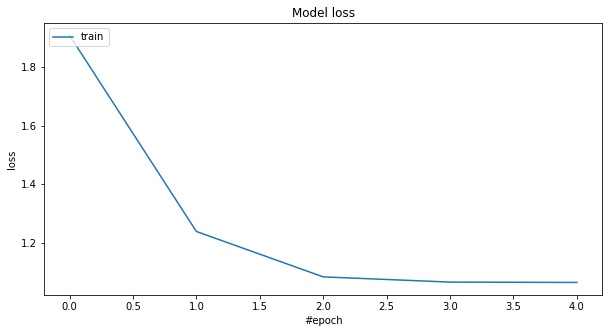

In [ ]:
plot_learning_curves(history)

In [ ]:
model.save(f'/content/drive/Shareddrives/Etude de cas PSIE/Modèles/{folder[:-1]}.h5')

à chier pour la prédiction malgré une faible loss

Chaque modèle fait ~34Ko

## Visualisation prediction

In [ ]:
import datetime as dt

listDataByHouse = []

folder = 'data A50-3/'
tmp = folder[5:].split('-')
if tmp[0][0] == 'A':
  appart = 1
else:
  appart = 0

surface = int(tmp[0][1:])
nbHab = int(tmp[1][-2])

i = 0
for f in os.listdir(DATA + '/' + folder):  
  #Dossier avec des noms de fichiers différents
  if appart == 1 and surface == 120 and nbHab == 4:
    id = f[20:-5]
  else:
    id = f.split('-')[2][:-4]

  df = pd.read_csv(f'{DATA}/{folder}/{f}')
  for index, rows in df.iterrows():
    if(index == 0):
      continue
    
    tmp = rows[0].split('/')
    # Use 2020 so same date with different year got the same info (pas forcément obligatoire)
    #date = dt.date(int(tmp[2]), int(tmp[0]), int(tmp[1])).toordinal()
    date = int(tmp[1])*100+int(tmp[0])

    #Parse by column (for each hour)
    for j in range(0, len(rows)-2):
      listDataByHouse.append([date, j, float(rows[j+2])])
  
  #get first 5 files
  i += 1
  if i >= 30:
    break

dataByHouse = pd.DataFrame(listDataByHouse, columns=['date', 'heure', 'conso'])

In [ ]:
dataByHouse

,date,heure,conso
0,1412,0,0.2686
1,1412,1,0.3237
2,1412,2,0.3010
3,1412,3,0.4036
4,1412,4,0.3561
...,...,...,...
1553755,101,43,0.4790
1553756,101,44,0.3993
1553757,101,45,0.4448
1553758,101,46,0.4058


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
name = 'data A50-3'
model = load_model(f'/content/drive/Shareddrives/Etude de cas PSIE/Modèles/{name}.h5')

In [ ]:
datas = [[i, 20000] for i in range(48)]
print(datas)
model.predict(tf.expand_dims(dataByHouse.drop('conso', axis=1).to_numpy().tolist(), axis=1))

[[0, 20000], [1, 20000], [2, 20000], [3, 20000], [4, 20000], [5, 20000], [6, 20000], [7, 20000], [8, 20000], [9, 20000], [10, 20000], [11, 20000], [12, 20000], [13, 20000], [14, 20000], [15, 20000], [16, 20000], [17, 20000], [18, 20000], [19, 20000], [20, 20000], [21, 20000], [22, 20000], [23, 20000], [24, 20000], [25, 20000], [26, 20000], [27, 20000], [28, 20000], [29, 20000], [30, 20000], [31, 20000], [32, 20000], [33, 20000], [34, 20000], [35, 20000], [36, 20000], [37, 20000], [38, 20000], [39, 20000], [40, 20000], [41, 20000], [42, 20000], [43, 20000], [44, 20000], [45, 20000], [46, 20000], [47, 20000]]
48555/48555 [==============================] - 77s 2ms/step


array([[0.3315752 ],
       [0.3315752 ],
       [0.3315752 ],
       ...,
       [0.33154774],
       [0.33153945],
       [0.3315286 ]], dtype=float32)

In [ ]:
print(dataByHouse.loc[(dataByHouse['date'] == 737800) & (dataByHouse['heure'] == 10)])

           date  heure   conso
33754    737800     10  0.6776
85546    737800     10  1.2566
137338   737800     10  1.1401
189130   737800     10  0.6946
240922   737800     10  0.5949
292714   737800     10  0.9265
344506   737800     10  0.7243
396298   737800     10  1.3133
448090   737800     10  0.6322
499882   737800     10  0.4934
551674   737800     10  0.4696
603466   737800     10  0.7207
655258   737800     10  0.4722
707050   737800     10  1.2314
758842   737800     10  0.4691
810634   737800     10  0.7104
862426   737800     10  0.8090
914218   737800     10  1.6037
966010   737800     10  0.8417
1017802  737800     10  1.0525
1069594  737800     10  0.9213
1121386  737800     10  1.1691
1173178  737800     10  0.6239
1224970  737800     10  0.6644
1276762  737800     10  0.8503
1328554  737800     10  0.6584
1380346  737800     10  0.8412
1432138  737800     10  0.5280
1483930  737800     10  0.5877
1535722  737800     10  0.6230


## Modèle bitcoiner fou

In [ ]:
dataByHouse = pd.read_csv('/content/drive/Shareddrives/Etude de cas PSIE/DataByType/M110-4.csv')
dataByHouse = dataByHouse.set_index("datetime")
dataByHouse=dataByHouse.drop(columns=["typeLogement", 'surface',"nbHabs"])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

Créer une fenêtre de valeurs en entrer pour prédire la suivante

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 48
x1, y1 = df_to_X_y(dataByHouse, WINDOW_SIZE)
x1.shape, y1.shape

((51744, 48, 1, 1), (51744, 1))

In [ ]:
X_train1, y_train1 = x1[:40000], y1[:40000]
X_val1, y_val1 = x1[40000:45000], y1[40000:45000]
X_test1, y_test1 = x1[45000:], y1[45000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((40000, 48, 1, 1),
 (40000, 1),
 (5000, 48, 1, 1),
 (5000, 1),
 (6744, 48, 1, 1),
 (6744, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10)

Epoch 1/10
1250/1250 [==============================] - 30s 21ms/step - loss: 0.1090 - root_mean_squared_error: 0.3301 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2096
Epoch 2/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.0695 - root_mean_squared_error: 0.2636 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1948
Epoch 3/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.0588 - root_mean_squared_error: 0.2424 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1739
Epoch 4/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.0519 - root_mean_squared_error: 0.2278 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1680
Epoch 5/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.0479 - root_mean_squared_error: 0.2189 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1655
Epoch 6/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.0435 - root_mean_squared_error: 0.2086 -

Afficher la différence entre prédiction et réalité sur le jeu d'apprentissage

In [ ]:
train_predictions = model1.predict(X_train1).flatten()

1250/1250 [==============================] - 11s 8ms/step


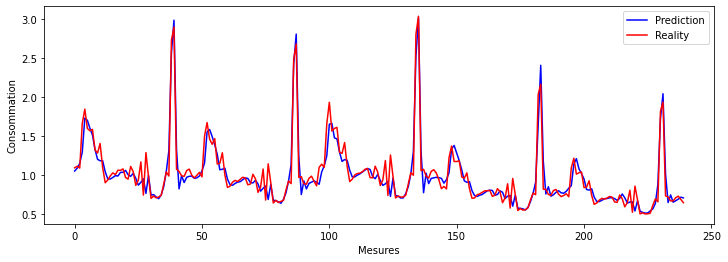

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(train_predictions[1680:1920], color='b')
plt.plot(y_train1[1680:1920], color='r')
plt.xlabel("Mesures")
plt.ylabel("Consommation")
plt.legend(["Prediction", "Reality"])
plt.show()

Afficher la différence entre prédiction et réalité sur le jeu de test

In [ ]:
train_predictions = model1.predict(X_val1).flatten()

157/157 [==============================] - 2s 7ms/step


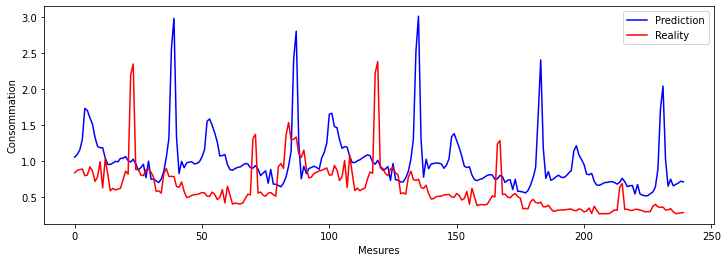

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(train_predictions[1680:1920], color='b')
plt.plot(y_val1[1680:1920], color='r')
plt.xlabel("Mesures")
plt.ylabel("Consommation")
plt.legend(["Prediction", "Reality"])
plt.show()

Afficher la différence entre prédiction et réalité sur test

In [ ]:
train_predictions = model1.predict(X_test1).flatten()

211/211 [==============================] - 1s 6ms/step


In [ ]:
y_test1[1]

array([0.25286657])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 4))

d = y_test1[6000:6500]
d += train_predictions[6500:6700]

print(len(d))

plt.plot(d[0:500], color='b')
plt.plot(d[500:700], color='r')
plt.show()

ValueError: ignored

<Figure size 1728x288 with 0 Axes>

On donne date => récupérer l'historique des val précédentes => intégrer modèle => prédiction sur jour +1

## Prophet 🙏

https://facebook.github.io/prophet/docs/quick_start.html#python-api

### Train model

In [ ]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json

In [ ]:
listDataByHouse = []

folder = os.listdir(DATA)[12]
print(folder)

i = 0
for f in os.listdir(DATA + '/' + folder):
  df = pd.read_csv(f'{DATA}/{folder}/{f}')
  for index, rows in df.iterrows():
    if(index == 0):
      continue
    
    tmp = rows[0].split('/')
    # Use 2020 so same date with different year got the same info (pas forcément obligatoire)
    date = dt.date(int(tmp[2]), int(tmp[0]), int(tmp[1]))

    #Parse by column (for each hour)
    for j in range(0, len(rows)-2):
      dateWithHour = dt.datetime.combine(date, dt.time(int(j/2), 30*(j%2)))
      listDataByHouse.append([dateWithHour, float(rows[j+2])])
  
  #get first 10 files
  i += 1
  if i > 10:
    break

dataByHouse = pd.DataFrame(listDataByHouse, columns=['ds', 'y'])
dataByHouse=dataByHouse.sort_values(by="ds")

data M120-5


In [ ]:
dataByHouse.shape

(569712, 2)

In [ ]:
#train=dataByHouse.iloc[:300000]
#train.shape

In [ ]:
model = Prophet(changepoint_prior_scale=0.01, daily_seasonality=True)
model.fit(dataByHouse)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplmrm9gei/5lsf5ysr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplmrm9gei/g_v2i5kb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66654', 'data', 'file=/tmp/tmplmrm9gei/5lsf5ysr.json', 'init=/tmp/tmplmrm9gei/g_v2i5kb.json', 'output', 'file=/tmp/tmplmrm9gei/prophet_model22b3hef4/prophet_model-20230119131903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:19:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
with open(f'/content/drive/Shareddrives/Etude de cas PSIE/Modèles/{folder}.json', 'w') as f:
    f.write(model_to_json(model))  # Save model

### Predict model

In [ ]:
with open('/content/drive/Shareddrives/Etude de cas PSIE/Modèles/data A30-2.json', 'r') as f:
    model = model_from_json(f.read())  # Load model

In [ ]:
testDates = []
for i in range(5):
  date = dt.date(2023, 1, (1+i))

  #Parse by column (for each hour)
  for j in range(48):
    dateWithHour = dt.datetime.combine(date, dt.time(int(j/2), 30*(j%2)))
    testDates.append(dateWithHour)

testDates = pd.DataFrame(testDates, columns=['ds'])

In [ ]:
forecast = model.predict(testDates)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01 00:00:00,0.180707,0.149503,0.384305,0.180707,0.180707,0.081262,0.081262,0.081262,-0.002121,...,0.008956,0.008956,0.008956,0.074427,0.074427,0.074427,0.0,0.0,0.0,0.261969
1,2023-01-01 00:30:00,0.180706,0.148866,0.378364,0.180706,0.180706,0.084672,0.084672,0.084672,0.001222,...,0.008981,0.008981,0.008981,0.074469,0.074469,0.074469,0.0,0.0,0.0,0.265377
2,2023-01-01 01:00:00,0.180705,0.154283,0.385933,0.180705,0.180705,0.088138,0.088138,0.088138,0.004628,...,0.009000,0.009000,0.009000,0.074510,0.074510,0.074510,0.0,0.0,0.0,0.268844
3,2023-01-01 01:30:00,0.180704,0.161984,0.389940,0.180704,0.180704,0.090978,0.090978,0.090978,0.007413,...,0.009013,0.009013,0.009013,0.074552,0.074552,0.074552,0.0,0.0,0.0,0.271682
4,2023-01-01 02:00:00,0.180704,0.153254,0.386274,0.180704,0.180704,0.092683,0.092683,0.092683,0.009069,...,0.009020,0.009020,0.009020,0.074594,0.074594,0.074594,0.0,0.0,0.0,0.273387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023-01-05 21:30:00,0.180530,0.140645,0.376359,0.180530,0.180530,0.077982,0.077982,0.077982,-0.000212,...,-0.008795,-0.008795,-0.008795,0.086989,0.086989,0.086989,0.0,0.0,0.0,0.258512
236,2023-01-05 22:00:00,0.180529,0.141822,0.370709,0.180529,0.180529,0.074813,0.074813,0.074813,-0.003429,...,-0.008810,-0.008810,-0.008810,0.087052,0.087052,0.087052,0.0,0.0,0.0,0.255342
237,2023-01-05 22:30:00,0.180528,0.144097,0.363502,0.180528,0.180528,0.072835,0.072835,0.072835,-0.005462,...,-0.008818,-0.008818,-0.008818,0.087115,0.087115,0.087115,0.0,0.0,0.0,0.253363
238,2023-01-05 23:00:00,0.180527,0.135627,0.371521,0.180527,0.180527,0.072459,0.072459,0.072459,-0.005901,...,-0.008818,-0.008818,-0.008818,0.087177,0.087177,0.087177,0.0,0.0,0.0,0.252986


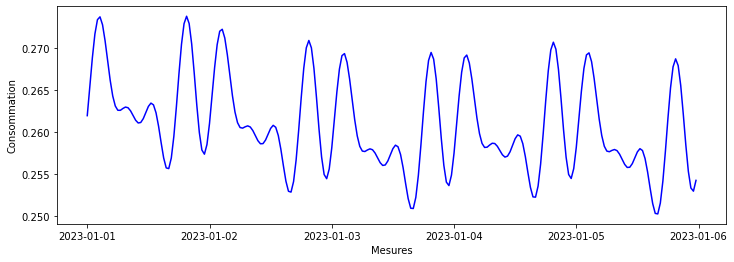

In [ ]:
import matplotlib.pyplot as plt

#cleanDataByHouse = pd.DataFrame([dataByHouse.loc[i*10] for i in range(240)])

plt.figure(figsize=(12, 4))
plt.plot(forecast['ds'], forecast['yhat'], color='b')
#plt.plot(cleanDataByHouse['ds'], cleanDataByHouse['y'], color='r')
plt.xlabel("Mesures")
plt.ylabel("Consommation")
#plt.legend(["Prediction", "Reality"])
plt.show()

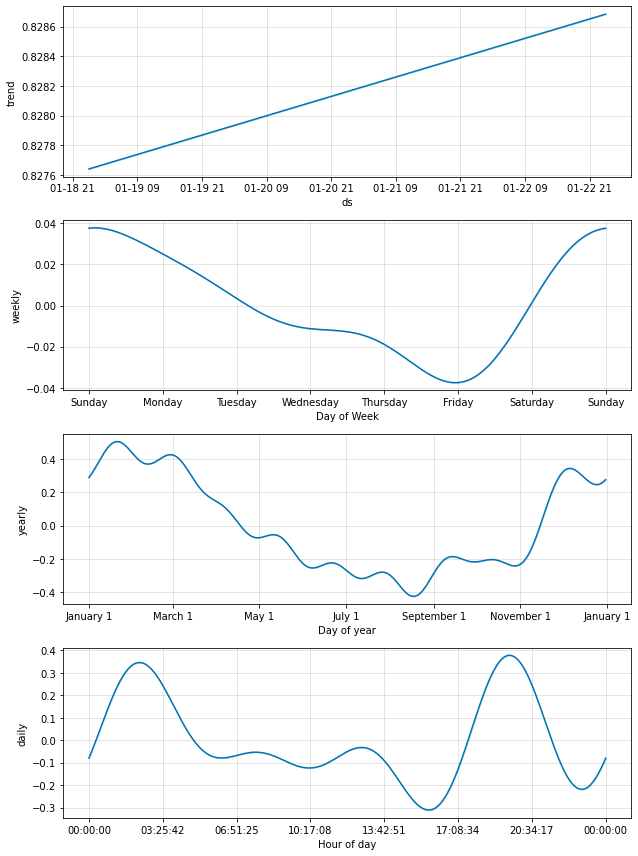

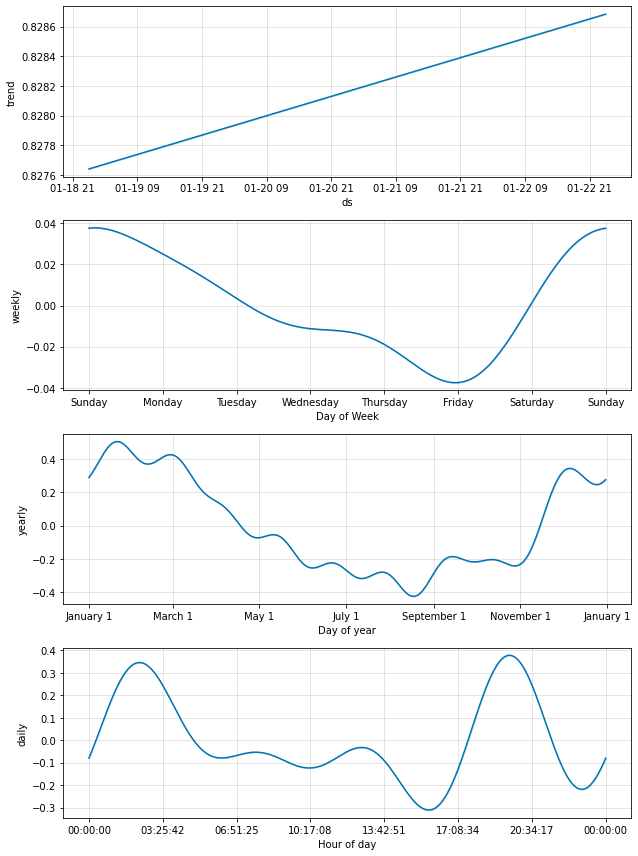

In [ ]:
model.plot_components(forecast, uncertainty=True)